In [7]:
from fastai.vision.all import *

path = untar_data(URLs.PASCAL_2007)

In [3]:
path.ls()

(#8) [Path('/home/john/.fastai/data/pascal_2007/valid.json'),Path('/home/john/.fastai/data/pascal_2007/train.json'),Path('/home/john/.fastai/data/pascal_2007/test.json'),Path('/home/john/.fastai/data/pascal_2007/segmentation'),Path('/home/john/.fastai/data/pascal_2007/train'),Path('/home/john/.fastai/data/pascal_2007/test'),Path('/home/john/.fastai/data/pascal_2007/train.csv'),Path('/home/john/.fastai/data/pascal_2007/test.csv')]

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [8]:
dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ', item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/fastai/data/transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):


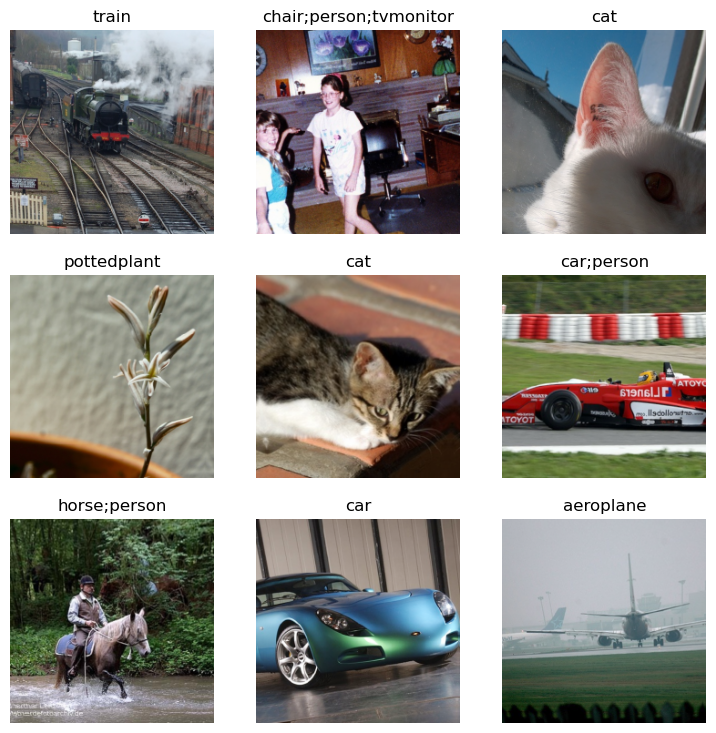

In [10]:
dls.show_batch()

In [12]:
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'


In [13]:
learn = vision_learner(dls, resnet50, metrics=[partial(accuracy_multi, thresh=0.5), f1_macro, f1_samples])

/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/john/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 293MB/s]


SuggestedLRs(valley=0.0014454397605732083)

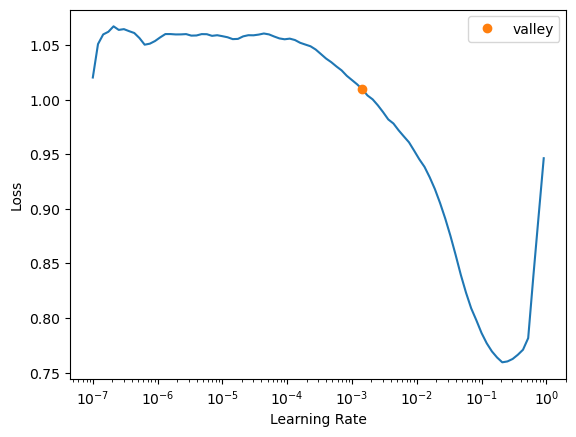

In [14]:
learn.lr_find()

In [18]:
learn.fine_tune(2, 1.4e-3)

epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.504711,0.330159,0.910080,0.553940,0.638977,01:03


/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/fastai/data/transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/fastai/data/transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.374188,0.235091,0.955199,0.705659,0.775067,01:01
1,0.306144,0.196863,0.965617,0.764287,0.809554,00:59


/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/fastai/data/transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/fastai/data/transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/fastai/data/transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is depreca

/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/fastai/data/transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


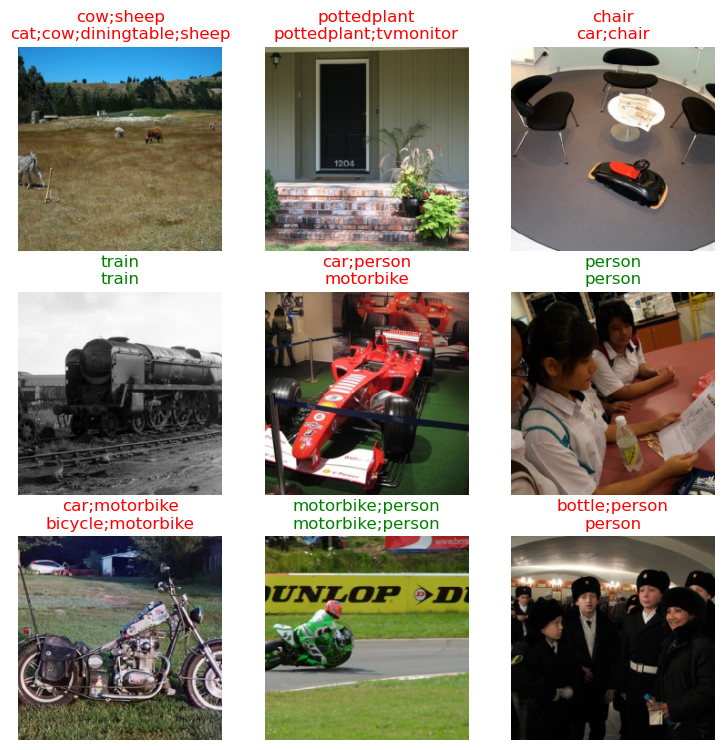

In [20]:
learn.show_results()

In [21]:
learn.predict(path/'train/000005.jpg')

((#3) ['chair','diningtable','sofa'],
 tensor([False, False, False, False, False, False, False, False,  True, False,
          True, False, False, False, False, False, False,  True, False, False]),
 tensor([0.1123, 0.1500, 0.0670, 0.1813, 0.2443, 0.1719, 0.0335, 0.1222, 0.9998,
         0.1256, 0.9581, 0.0229, 0.1328, 0.1460, 0.0616, 0.3888, 0.1813, 0.5896,
         0.0853, 0.2183]))

/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/fastai/data/transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/fastai/data/transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


,target,predicted,probabilities,loss
0,dog;pottedplant;sofa;tvmonitor,cat;dog,"tensor([0.0533, 0.1554, 0.0525, 0.2047, 0.1348, 0.0956, 0.0168, 0.9990, 0.3191,\n 0.1130, 0.1572, 0.8535, 0.1650, 0.2280, 0.0215, 0.1590, 0.1761, 0.2306,\n 0.1317, 0.0523])",0.7767339944839478
1,car,motorbike;person,"tensor([0.0466, 0.0421, 0.0354, 0.1823, 0.0666, 0.1091, 0.1493, 0.0523, 0.0842,\n 0.0548, 0.0834, 0.0718, 0.0600, 1.0000, 0.7267, 0.1338, 0.0830, 0.0743,\n 0.1979, 0.1525])",0.7673631906509399
2,dog,cat;sofa,"tensor([0.0298, 0.1419, 0.0951, 0.2198, 0.1107, 0.1098, 0.1050, 1.0000, 0.1324,\n 0.3143, 0.2037, 0.4752, 0.2398, 0.1760, 0.0578, 0.1722, 0.2376, 0.5056,\n 0.1297, 0.0783])",0.7192026972770691
3,bus;person,bus;car,"tensor([0.1019, 0.0986, 0.0481, 0.0823, 0.1280, 0.8508, 0.9999, 0.0644, 0.1030,\n 0.0805, 0.0780, 0.0755, 0.0771, 0.0900, 0.0329, 0.0555, 0.1416, 0.2141,\n 0.0375, 0.1587])",0.7061112523078918
4,chair;person,chair;sofa,"tensor([0.1076, 0.1771, 0.1087, 0.1874, 0.1937, 0.1986, 0.0958, 0.0591, 0.9126,\n 0.1008, 0.0698, 0.2138, 0.1024, 0.1547, 0.0246, 0.4335, 0.1043, 0.9968,\n 0.1430, 0.4081])",0.6413901448249817
5,person;tvmonitor,bottle;chair;diningtable;person;pottedplant,"tensor([0.1435, 0.0987, 0.0627, 0.0962, 0.8065, 0.1758, 0.0337, 0.0388, 0.7034,\n 0.1249, 0.9779, 0.0418, 0.0650, 0.1222, 0.9880, 0.6568, 0.2642, 0.1280,\n 0.1624, 0.1558])",0.5647895932197571
6,diningtable;pottedplant;sofa,bottle;chair;diningtable;sofa,"tensor([0.1294, 0.1974, 0.0515, 0.1320, 0.7627, 0.1487, 0.0785, 0.0404, 0.9988,\n 0.0831, 0.9903, 0.0740, 0.1259, 0.0671, 0.0964, 0.4483, 0.2675, 0.8293,\n 0.1677, 0.1217])",0.5546829700469971
7,car,bicycle;car;motorbike;person,"tensor([0.1082, 0.6098, 0.1170, 0.1752, 0.2197, 0.3321, 0.8217, 0.1282, 0.4236,\n 0.1915, 0.1192, 0.0494, 0.1902, 0.6369, 0.9959, 0.1474, 0.2683, 0.2480,\n 0.0608, 0.0978])",0.5469390749931335
8,pottedplant;sofa;tvmonitor,chair;sofa;tvmonitor,"tensor([0.1704, 0.2884, 0.0828, 0.2525, 0.2416, 0.2582, 0.0674, 0.2837, 0.9980,\n 0.3055, 0.4421, 0.1272, 0.1563, 0.0946, 0.0134, 0.4848, 0.2425, 0.8790,\n 0.1855, 0.9658])",0.5416349768638611
9,dog;person,bird;dog;pottedplant,"tensor([0.0328, 0.1715, 0.9372, 0.0625, 0.3717, 0.0331, 0.0242, 0.4006, 0.3085,\n 0.0353, 0.3671, 0.9452, 0.0773, 0.1405, 0.0137, 0.5621, 0.0857, 0.1436,\n 0.0326, 0.1301])",0.538568913936615


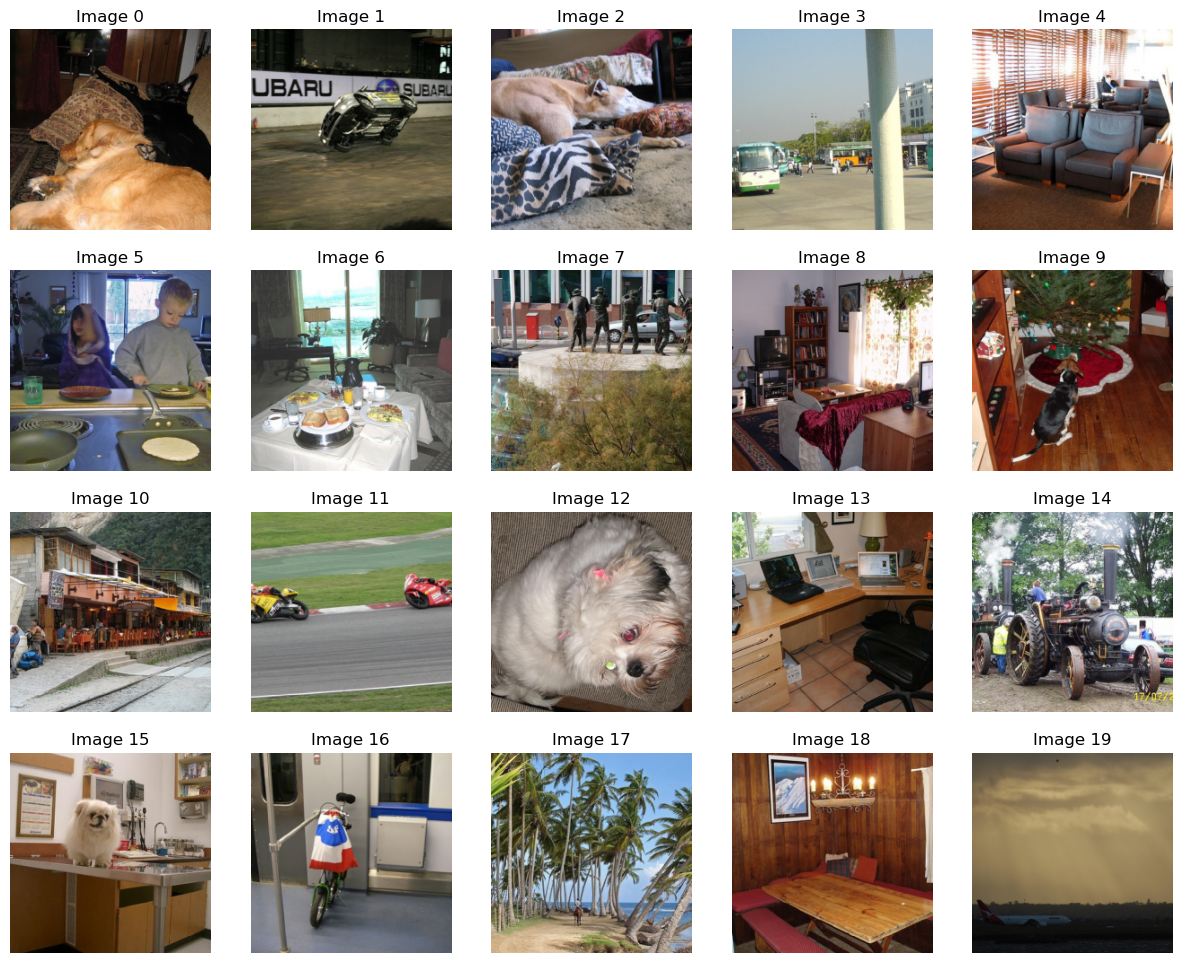

In [22]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(20)